This project aims to test the hot hand fallacy using Bernoulli trials. The shooting average (p) and other preset values were given in the project description.

In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import seaborn as sns

Helper functions

In [2]:
def generate_sequence(p: float, sequence_length: int) -> list[int]:
    result = np.empty(sequence_length, int)

    for i in range(sequence_length):
        r = random()
        if r > p:
            result[i] = 0
        else:
            result[i] = 1

    return result

In [3]:
def calculate_statistics(data: list[float]) -> list[float]:
    return [
        np.mean(data),
        np.median(data),
        np.std(data),
        np.percentile(data, 25),
        np.percentile(data, 75),
        np.min(data),
        np.max(data)
    ]

Main function to generate probabilities and output results

In [4]:
def test_fallacy(p: float, sequence_length: int, streak_length: int, n_sequences: int) -> None:
    probabilities = np.empty(n_sequences, float)
    i = 0
    retrials = 0
    while i < n_sequences:
        data = generate_sequence(p, sequence_length)

        hits = 0
        streaks = 0
        for j in range(sequence_length):
            if j < (sequence_length - streak_length) and sum(data[j:j+streak_length]) == streak_length:
                streaks += 1
                if data[j + streak_length] == 1:
                    hits += 1
        
        if streaks > 0:
            probabilities[i] = float(hits) / streaks
            i += 1
        else:
            retrials += 1

    # generate graph
    plt.figure(figsize=(8, 4))
    sns.histplot(probabilities, bins=10, kde=True, color="blue")

    plt.xlabel("Probability of a Hit After a Streak", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.title("Distribution of Probabilities", fontsize=14)
    plt.grid(True)

    plt.show

    # print statistics
    mean, median, sd, q1, q3, minP, maxP = calculate_statistics(probabilities)

    print(f"Retrials: {retrials}")
    print("")
    print(f"Mean: {mean:.4f}")
    print(f"Median: {median:.4f}")
    print(f"Standard Deviation: {sd:.4f}")
    print(f"Q1: {q1:.4f}")
    print(f"Q3: {q3:.4f}")
    print(f"Min: {minP:.4f}")
    print(f"Max: {maxP:.4f}")

Using given constants for sequence generation:

In [5]:
p = .3
sequence_length = 60
streak_length = 3
n_sequences = 10000

Retrials: 4521

Mean: 0.1956
Median: 0.0000
Standard Deviation: 0.2523
Q1: 0.0000
Q3: 0.5000
Min: 0.0000
Max: 1.0000


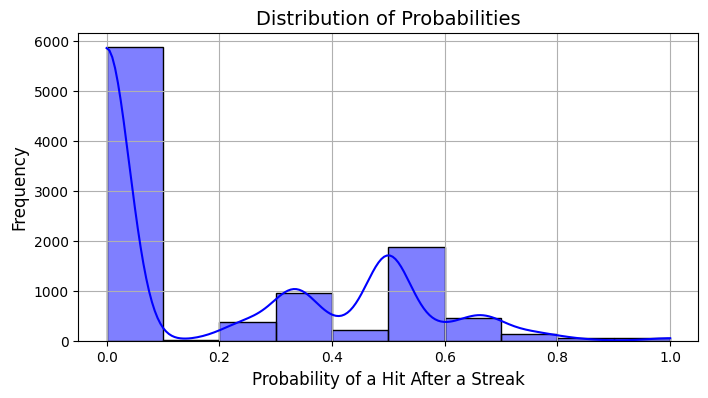

In [6]:
test_fallacy(p, sequence_length, streak_length, n_sequences)

This graph looks quite odd, but this is due to the values for p, sequence_length, and streak_length all being quite low. Since we are only considering streaks of 3, the probability of one individual sequence at only length 60 having a streak is not very high. This is demonstrated in the custom statistic "retrials," which is a count of the number of times the program had to regenerate a dataset. 

As a result of this and the low p value of .3, we get the spikes on the graph, especially around 0. Even with this large sample size, data clumps up at specific values.

To demonstrate, this is the result using more normalized values:

Retrials: 0

Mean: 0.4693
Median: 0.5000
Standard Deviation: 0.1553
Q1: 0.3750
Q3: 0.5833
Min: 0.0000
Max: 0.8636


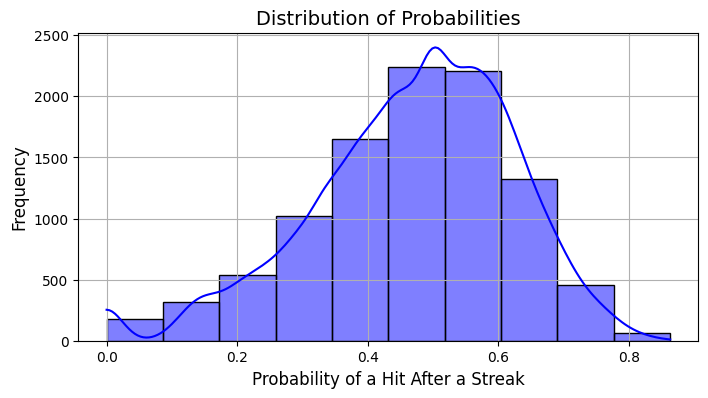

In [7]:
test_fallacy(.5, 50, 2, 10000)

As you can see, the distribution looks much more normal around the p value of .5